# Concrete strength prediction 

### Data Set Abstract :
Concrete is the most important material in civil engineering.
The concrete compressive strength is a highly nonlinear function of age and ingredients. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash,water, uperplasticizer, coarse aggregate, and fine aggregate.

### Source - UCI
Original Owner and Donor
Prof. I-Cheng Yeh
Department of Information Management
Chung-Hua University,
Hsin Chu, Taiwan 30067, R.O.C.
e-mail:icyeh '@' chu.edu.tw
TEL:886-3-5186511


### Data Set Information
● Number of instances : 1030

● Number of Attributes: 9

● Attribute breakdown 8 quantitative input variables, and 1 quantitative output variable

● Missing Attribute Values: None



## 1.0 Data Dictionary

#### Feature Description and data types - 

● Cement: a substance used for construction that hardens to other materials to bind them together, (measured in kg in a m3 mixture).

● Slag: Mixture of metal oxides and silicon dioxide, (measured in kg in a m3 mixture).

● Flyash: coal combustion product that is composed of the particulates that are driven out of coal-fired boilers together with the flue gases, (measured in kg in a m3 mixture).

● Water: It is used to form a thick paste, (measured in kg in a m3 mixture).

● SuperPlasticizer:  used in making high-strength concrete, (measured in kg in a m3 mixture).

● CoaseSeaggregate: prices of rocks obtain from ground deposits, (measured in kg in a m3 mixture).

● Fineaggregate: the size of aggregate small than 4.75mm, (measured in kg in a m3 mixture).

● Age: Rate of gain of strength is faster to start with and the rate gets reduced with age,day (1~365).

● CsMPa: Measurement unit of concrete strength,Concrete compressive strength measured in MPa [OUTPUT VARIABLE] .

In [1]:
####importing Required Packages####

import numpy as np # For linear algebra
import pandas as pd #For data processing

# For data visualization
import matplotlib.pyplot as plt  
%matplotlib inline
pd.__version__
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:\\Users\\Sushruth\\Downloads\\concrete.csv") #importing data


In [4]:
data.head() #data glimpse


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
data.shape #Number of Rows and columns


(1030, 9)

In [6]:
type(data) #Data Frame


pandas.core.frame.DataFrame

## 2.0 Data Preprocessing

In [7]:
data.info() # Data Type check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
data.describe() # describe data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
data.count() #count of rows


cement          1030
slag            1030
ash             1030
water           1030
superplastic    1030
coarseagg       1030
fineagg         1030
age             1030
strength        1030
dtype: int64

In [10]:
data.nunique() # Check number of unique values

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [11]:
data.isnull().sum() #Number of NA values


cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [12]:
data.duplicated().sum() #to find duplicate rows

25

### Observations :

● All of the data in the dataset is numerical

● No null/NAN data

● No Duplicates found

● Data Types are of proper format


## 3.0 Data Exploration
- Mutivariate Analysis
- Univariate Analysis

Text(0.5, 1.0, 'Outlier Analysis')

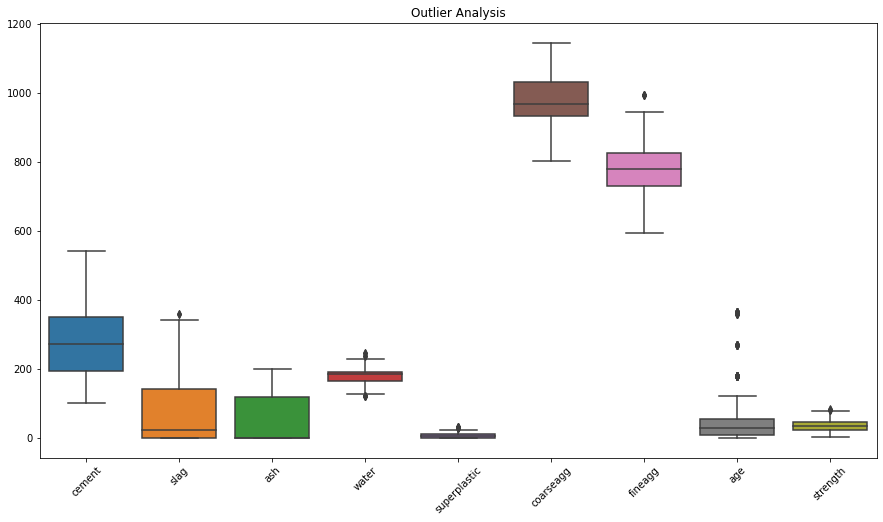

In [13]:
# Univariate distribution analysis
plt.subplots(figsize=(15, 8))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Outlier Analysis')


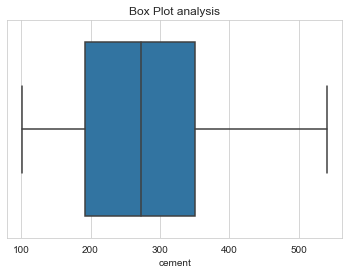

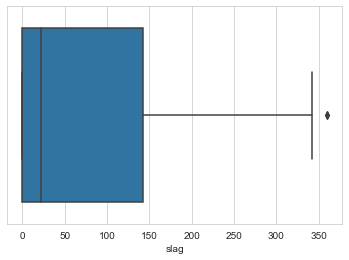

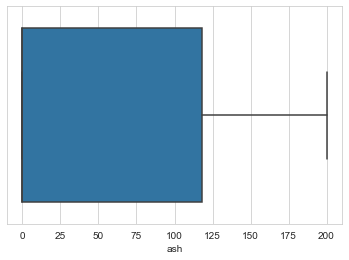

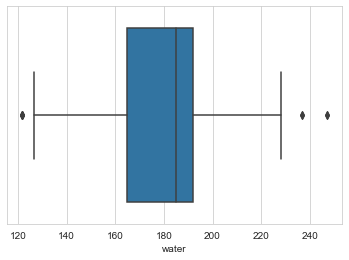

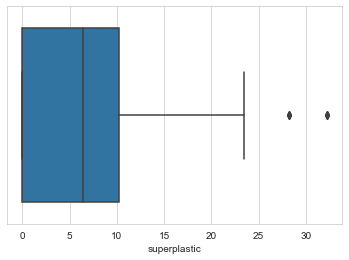

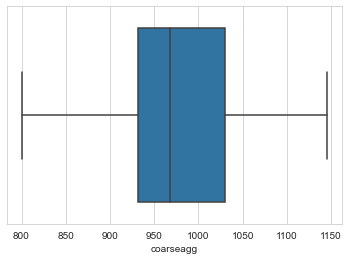

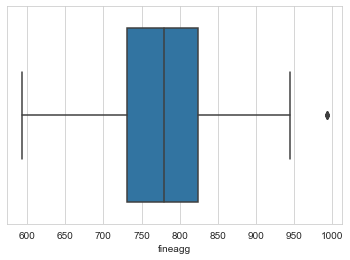

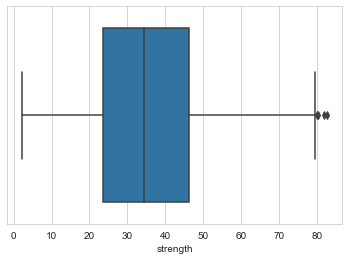

In [14]:
sns.set_style("whitegrid")
plt.title('Box Plot analysis')
sns.color_palette("pastel")
for col in data.columns:
    if col !='age':
        sns.boxplot(data[col])
        plt.show()

### Observations :
● Age column appears to be having maximum number of outliers

● Slag, Water, superplastic, fineagg features have some outliers

● All features except age and strength have same units(kg in m3 mixture) but have different scales. Thus we might need to scale 

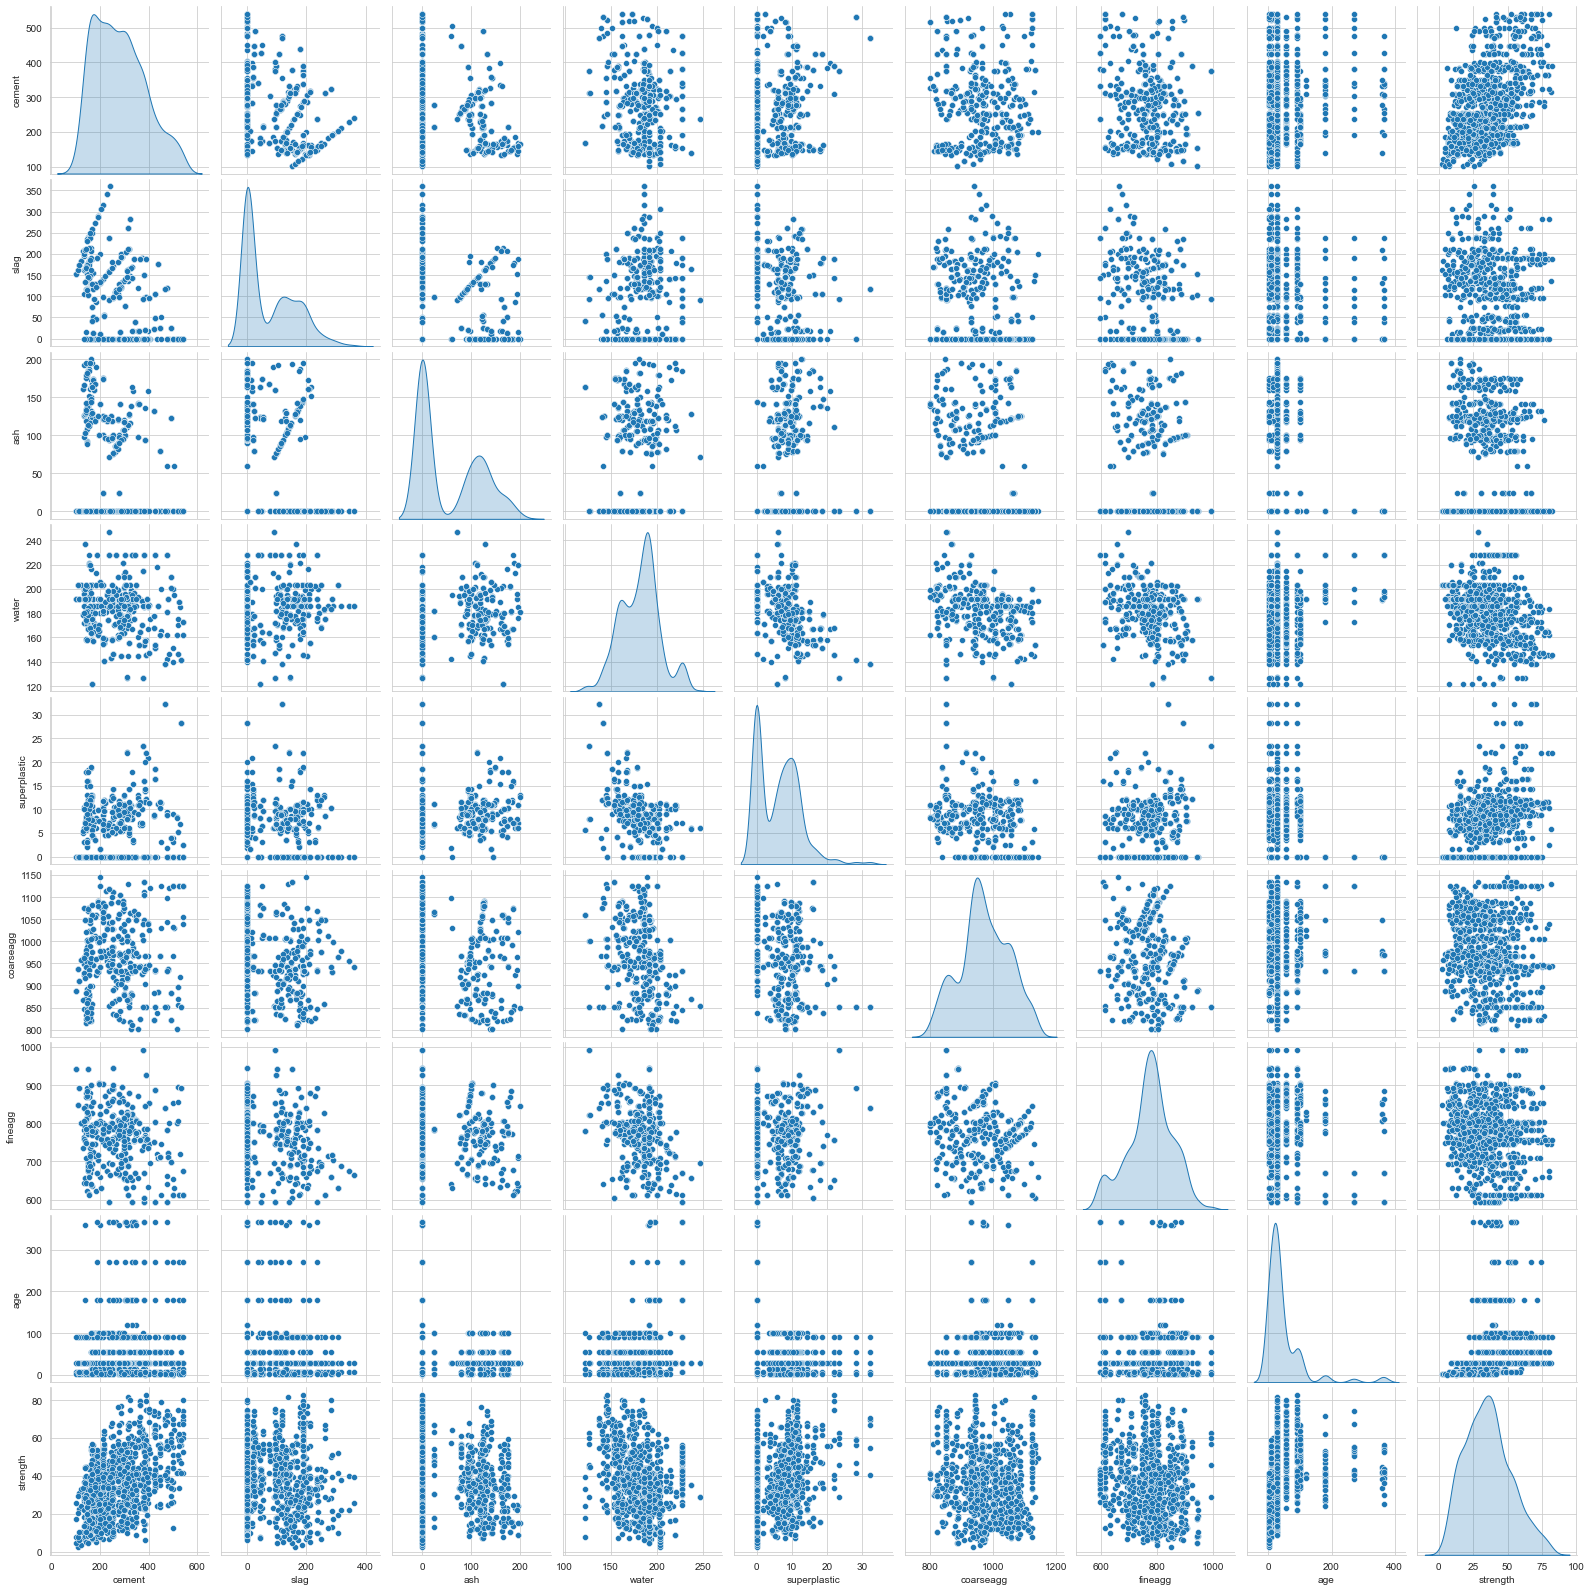

In [15]:
#Pairplot 
sns.pairplot(data,palette="Set2", diag_kind="kde", height=2.5)


Above describes the correlation between the variables.
-  Cement and Compressive Strength look like they may have some correlation

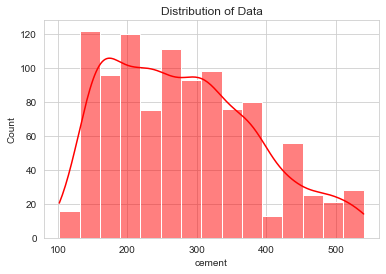

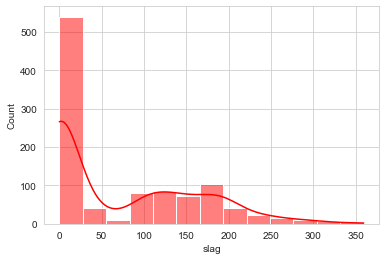

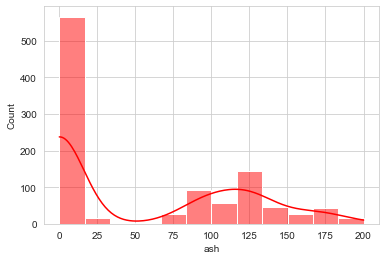

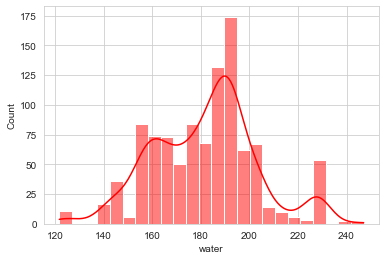

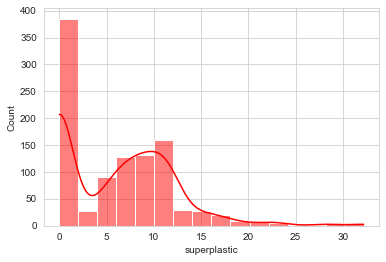

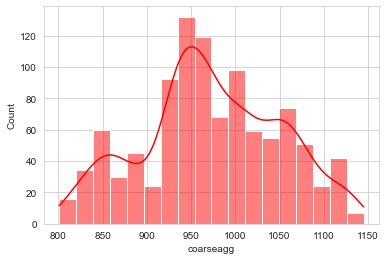

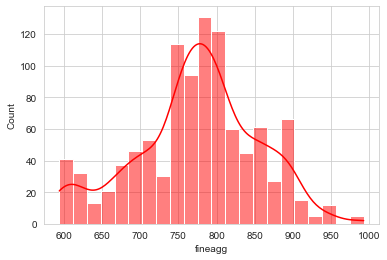

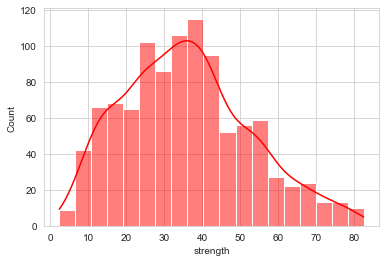

In [16]:
sns.color_palette("pastel")
plt.title('Distribution of Data')
for col in data.columns:
    if col !='age':
        sns.histplot(data[col],kde=True, color='red')
        plt.show()

### Observations :
● Distribution of strength looks close to normal so no need to make any changes.


Text(0.5, 1.0, 'Correlation matrix')

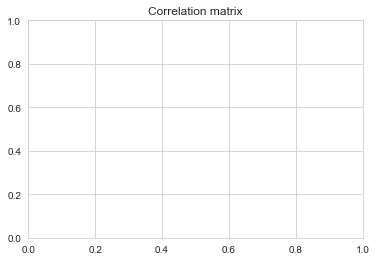

In [17]:
#Correlation

correlation=data.corr()
correlation.style.background_gradient(cmap='coolwarm')
plt.title('Correlation matrix')


In [18]:
#Corelation Index
data.corr()>0.5

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,True,False,False,False,False,False,False,False,False
slag,False,True,False,False,False,False,False,False,False
ash,False,False,True,False,False,False,False,False,False
water,False,False,False,True,False,False,False,False,False
superplastic,False,False,False,False,True,False,False,False,False
coarseagg,False,False,False,False,False,True,False,False,False
fineagg,False,False,False,False,False,False,True,False,False
age,False,False,False,False,False,False,False,True,False
strength,False,False,False,False,False,False,False,False,True


In [19]:
#Corelation Index
data.corr()<-0.5

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,False,False,False,False,False,False,False,False,False
slag,False,False,False,False,False,False,False,False,False
ash,False,False,False,False,False,False,False,False,False
water,False,False,False,False,True,False,False,False,False
superplastic,False,False,False,True,False,False,False,False,False
coarseagg,False,False,False,False,False,False,False,False,False
fineagg,False,False,False,False,False,False,False,False,False
age,False,False,False,False,False,False,False,False,False
strength,False,False,False,False,False,False,False,False,False


#### Observation
●  highest positive correlations is between Compressive Strength and Cement.

●  Age and Superplasticizer also have a positive impact on the Compressive Strength.

●  highly negative correlation between Superplasticizer and Water, but a positive correlation between Superplasticizer and Fly Ash.

● Compressive strength correlates negatively with Fly Ash

● Compressive strength correlates positively with Superplasticizer
